<a href="https://colab.research.google.com/github/KOWSALYAAARU/test_app/blob/main/Tatamoter_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
from pandas import Series
from numpy import log

#!pip install plotly
import plotly.express as px # high level interface
import plotly.graph_objects as go # lower level interface

In [2]:
#creating pandas df
df=pd.read_csv('TATAMOTORS.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
1,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
3,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
4,2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2385 non-null   object 
 1   Open       2384 non-null   float64
 2   High       2384 non-null   float64
 3   Low        2384 non-null   float64
 4   Close      2384 non-null   float64
 5   Adj Close  2384 non-null   float64
 6   Volume     2384 non-null   float64
dtypes: float64(6), object(1)
memory usage: 130.6+ KB


In [4]:
df.shape

(2385, 7)

In [5]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2380,False
2381,False
2382,False
2383,False


In [6]:
df['Open'].value_counts()

,count
Open,
400.000000,7
424.000000,7
436.000000,6
460.000000,6
423.000000,6
...,...
276.399994,1
274.600006,1
262.000000,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2385 entries, 0 to 2384
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2385 non-null   object 
 1   Open       2384 non-null   float64
 2   High       2384 non-null   float64
 3   Low        2384 non-null   float64
 4   Close      2384 non-null   float64
 5   Adj Close  2384 non-null   float64
 6   Volume     2384 non-null   float64
dtypes: float64(6), object(1)
memory usage: 130.6+ KB


In [8]:
df.columns


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
1,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
3,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
4,2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0


In [10]:
df= df[['Date','Open','High','Low','Close','Adj Close','Volume']]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
1,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
3,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
4,2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

,0
Date,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


# Durbin-wastson **Test**

In [13]:
import statsmodels.api as sm
print(sm.stats.durbin_watson(df['Open']))
print(sm.stats.durbin_watson(df['Volume']))

nan
nan


In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2384.000000,2384.000000,2384.000000,2384.000000,2384.000000,2.384000e+03
mean,404.445044,409.673919,398.248231,403.676186,401.528371,2.370178e+07
std,213.803021,215.590108,211.386080,213.511149,213.079466,3.040412e+07
min,66.500000,66.900002,63.500000,65.300003,64.896851,1.154721e+06
25%,260.000000,263.437500,255.875000,258.799988,257.202179,7.364087e+06
50%,406.825012,411.375000,400.550003,404.875000,402.237304,1.236892e+07
75%,484.974998,493.100006,478.125008,485.800010,482.751846,2.720649e+07
max,1167.000000,1179.000000,1145.300049,1161.849976,1161.849976,3.905778e+08


In [15]:
df.nunique()

,0
Date,2385
Open,1904
High,2075
Low,2077
Close,2142
Adj Close,2197
Volume,2384


In [16]:
df1=df.copy()

In [17]:
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
1,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2,2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
3,2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
4,2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0
...,...,...,...,...,...,...,...
2380,2024-08-27,1093.050049,1096.650024,1075.000000,1077.250000,1077.250000,8813305.0
2381,2024-08-28,1082.949951,1088.699951,1070.099976,1074.550049,1074.550049,8145376.0
2382,2024-08-29,1079.050049,1142.000000,1066.000000,1121.650024,1121.650024,40658159.0
2383,2024-08-30,1113.949951,1115.000000,1097.449951,1111.349976,1111.349976,17647545.0


In [18]:
df1.set_index('Date',inplace=True)

In [19]:
df1

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0
2015-01-06,508.891632,508.891632,493.951874,496.079071,492.816772,7979598.0
2015-01-07,489.746979,495.089661,484.008514,488.609192,485.395966,9232656.0
2015-01-08,498.651459,509.336853,495.683289,506.566559,503.235260,5535587.0
...,...,...,...,...,...,...
2024-08-27,1093.050049,1096.650024,1075.000000,1077.250000,1077.250000,8813305.0
2024-08-28,1082.949951,1088.699951,1070.099976,1074.550049,1074.550049,8145376.0
2024-08-29,1079.050049,1142.000000,1066.000000,1121.650024,1121.650024,40658159.0


In [20]:
start_date = df1.index.min()
end_date =  df1.index.max()
print("Start Date of Stocks:",start_date)
print("End Date of Stocks:",end_date)

Start Date of Stocks: 2015-01-02
End Date of Stocks: 2024-09-02


<Axes: xlabel='Date'>

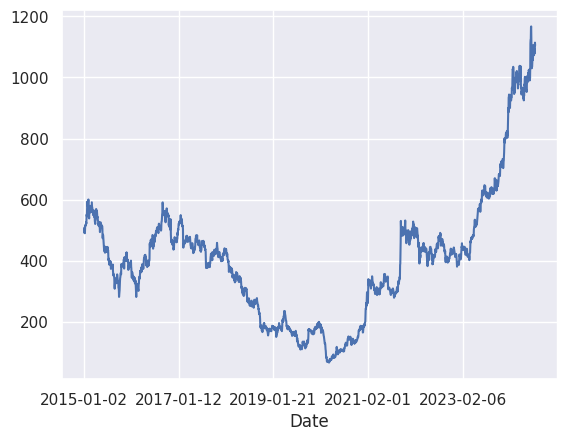

In [22]:
df1['Open'].plot()

In [23]:
stock_name='IOC'

In [24]:
df.head(2)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,491.973083,511.909271,491.973083,506.368683,503.038696,4193093.0
1,2015-01-05,504.686737,520.417969,501.322815,518.241333,514.833252,6758676.0


In [25]:
df2 = df[df['High']==stock_name]

In [26]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume


In [27]:
df2['High'].nunique()

0

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       0 non-null      object 
 1   Open       0 non-null      float64
 2   High       0 non-null      float64
 3   Low        0 non-null      float64
 4   Close      0 non-null      float64
 5   Adj Close  0 non-null      float64
 6   Volume     0 non-null      float64
dtypes: float64(6), object(1)
memory usage: 0.0+ bytes


In [29]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [30]:
df2.shape

(0, 7)

<Axes: >

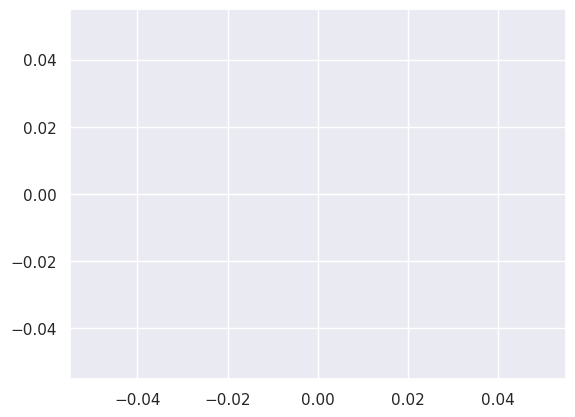

In [31]:
df2['Volume'].plot()

<Axes: >

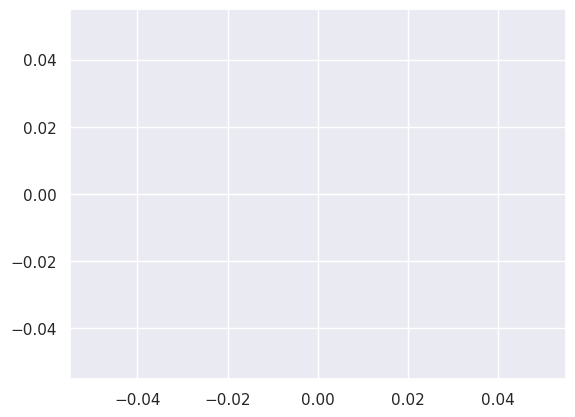

In [32]:
df2['Adj Close'].plot()

In [34]:
df2['Time_Stamp'] = pd.DataFrame(df, columns=['Date'])
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Time_Stamp
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-02
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-05
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-06
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-07
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-08


In [35]:
df2['Time_Stamp'] = pd.to_datetime(df2['Time_Stamp'])
df_final_model = df2.set_index('Time_Stamp')
df_final_model

,Date,Open,High,Low,Close,Adj Close,Volume
Time_Stamp,,,,,,,
2015-01-02,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-08,NaT,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2024-08-27,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-28,NaT,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-29,NaT,NaN,NaN,NaN,NaN,NaN,NaN


ValueError: List of boxplot statistics and `positions` values must have same the length

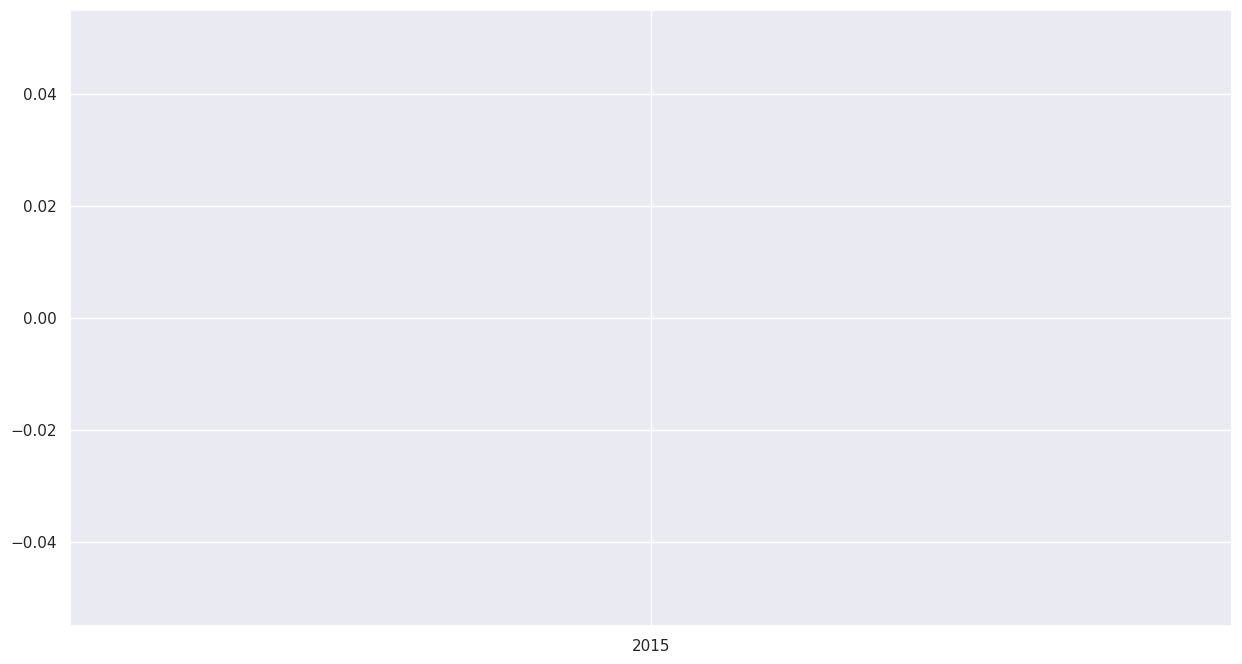

In [37]:
plt.figure(figsize=(15,8))
sns.boxplot(x= df_final_model.index.year, y=df_final_model['Open'] )
plt.grid()